In [35]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [36]:
IMG_HEIGHT = 384
IMG_WIDTH = 384

In [37]:
model = tf.keras.models.load_model("../DeepLabV3Plus")
for lay in model.layers:
    lay.trainable = False

In [38]:
X_path = "../example_image"
examp_img = sorted([os.path.join(dp, f) for dp, dn, filenames in os.walk(X_path) for f in filenames if os.path.splitext(f)[1] == '.png' or os.path.splitext(f)[1] == '.jpg'])

1/1 [==============================] - 1s 530ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


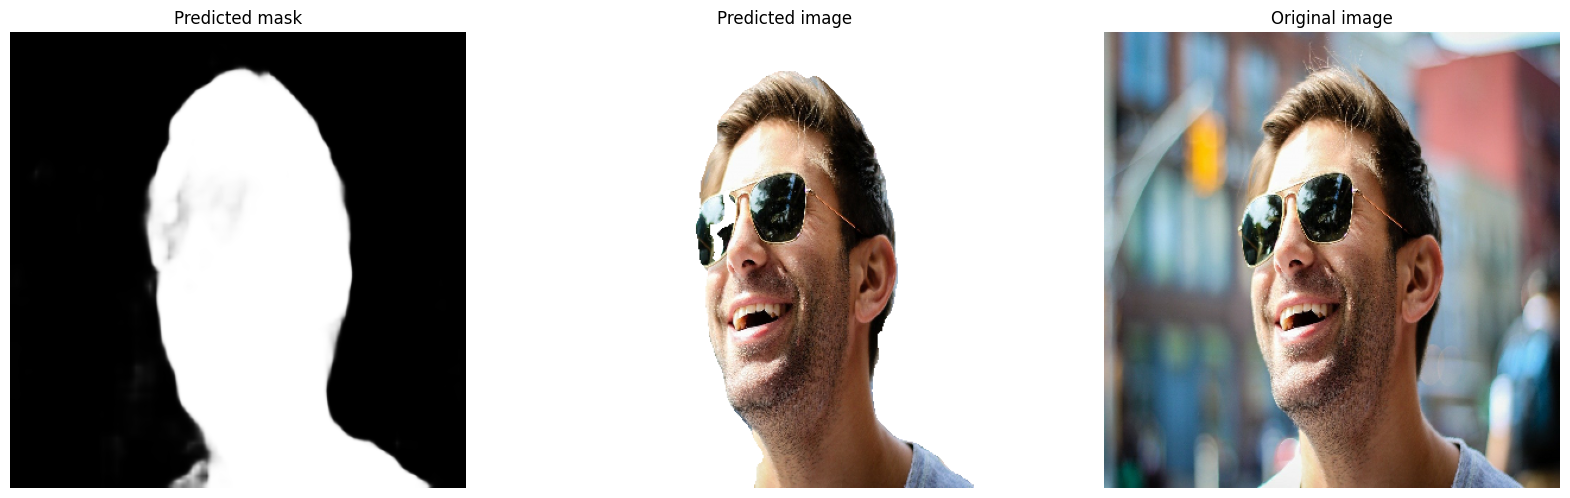



1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


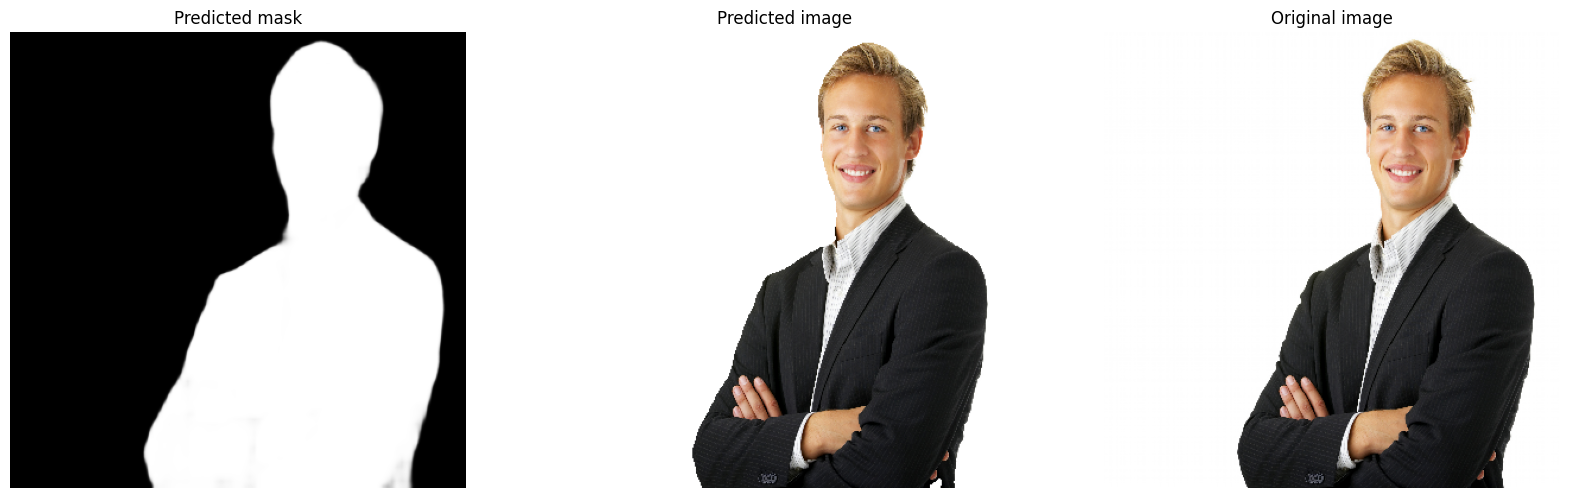



1/1 [==============================] - 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


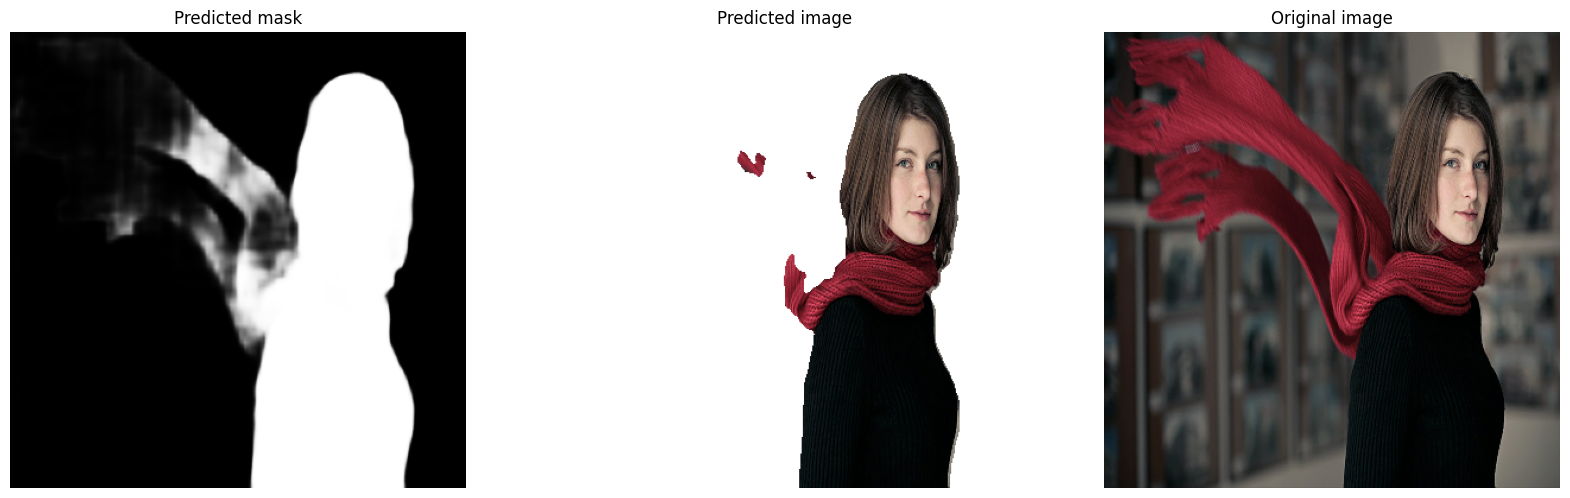



1/1 [==============================] - 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


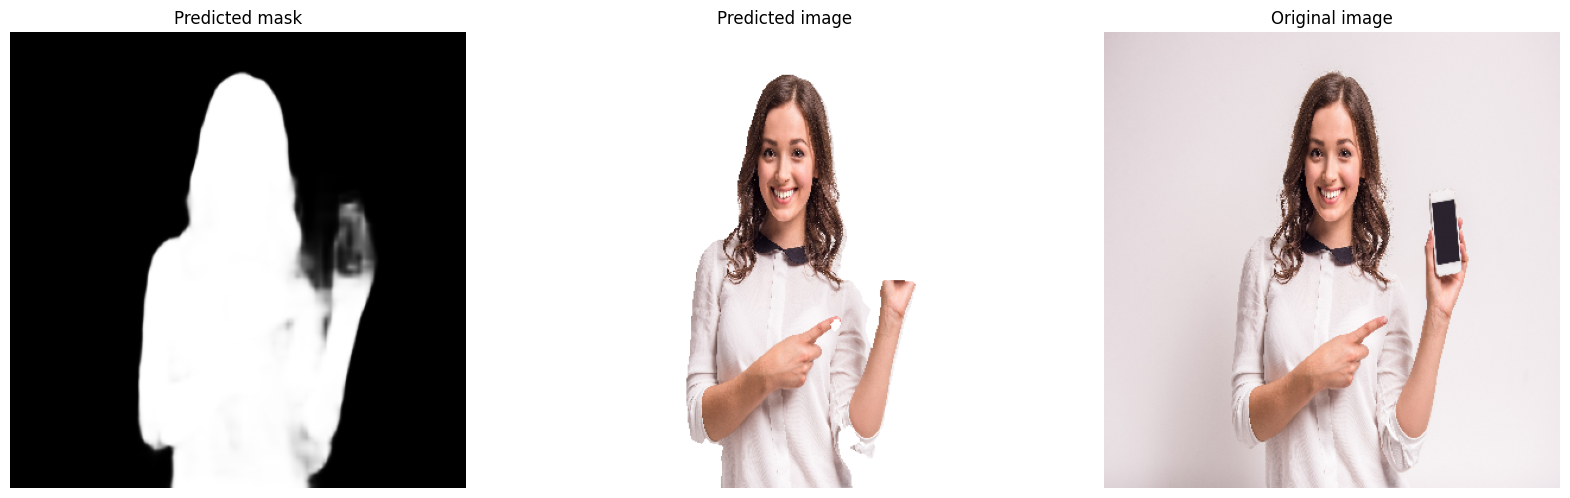



1/1 [==============================] - 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


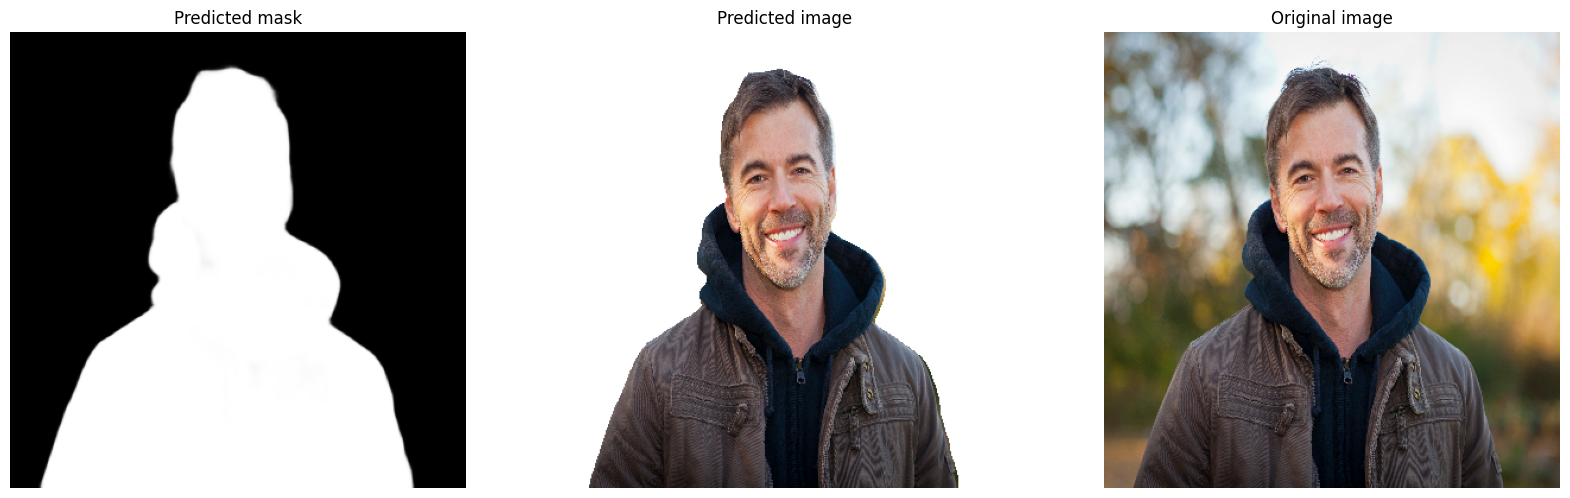



1/1 [==============================] - 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


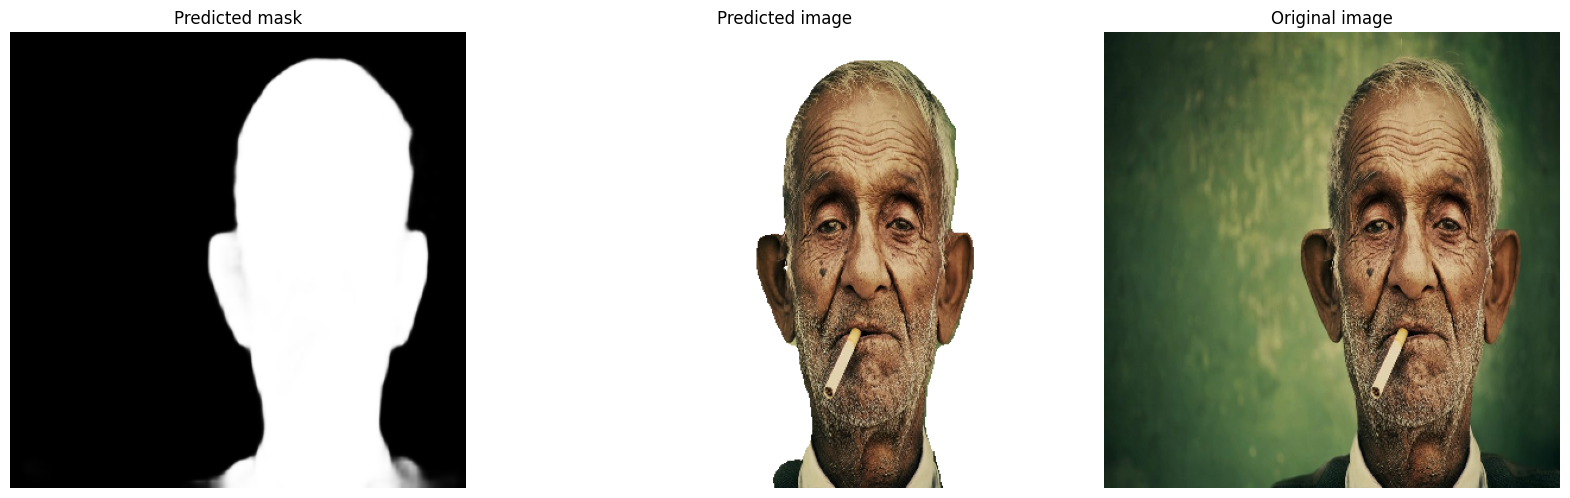



1/1 [==============================] - 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


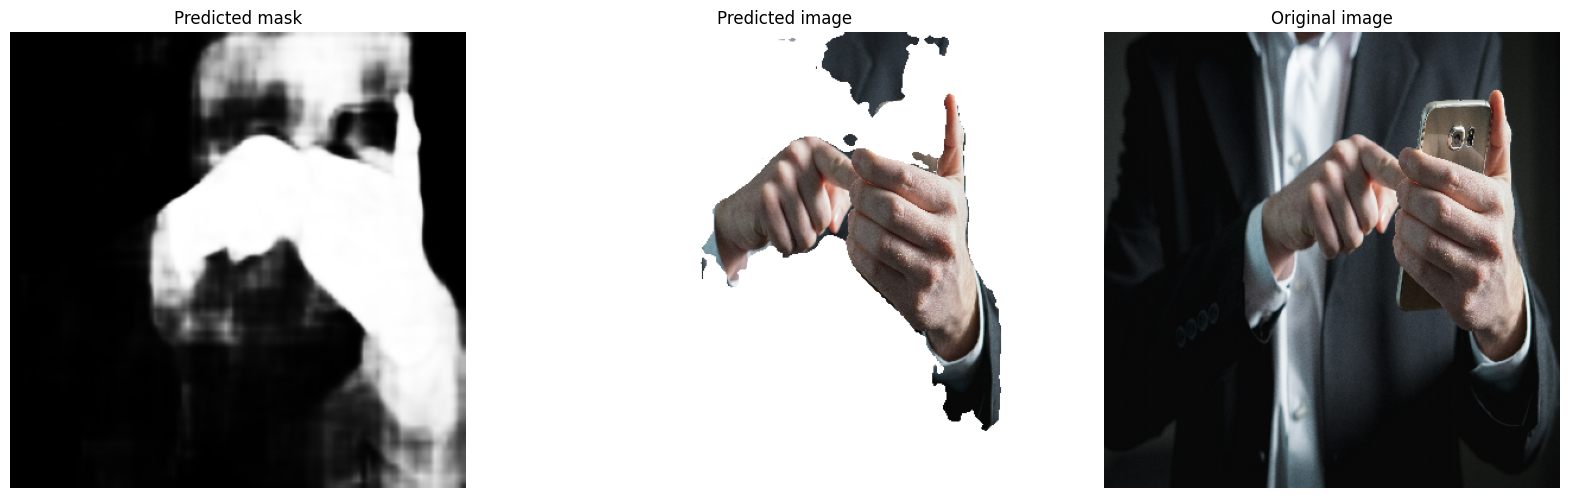



1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


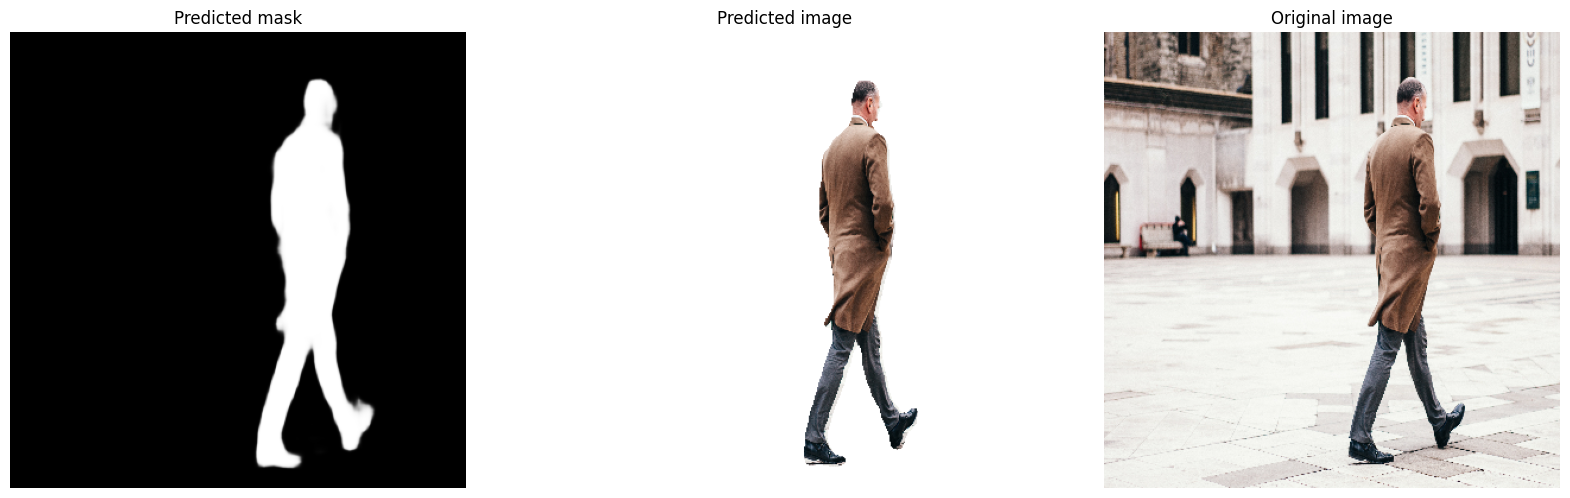



1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


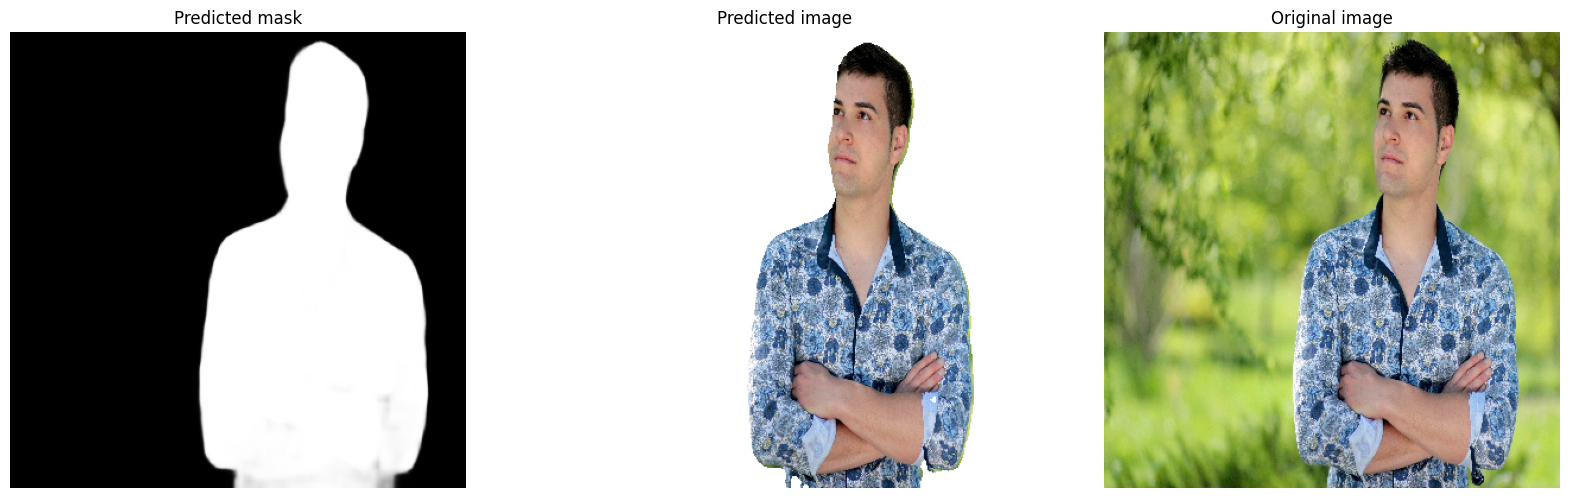



1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


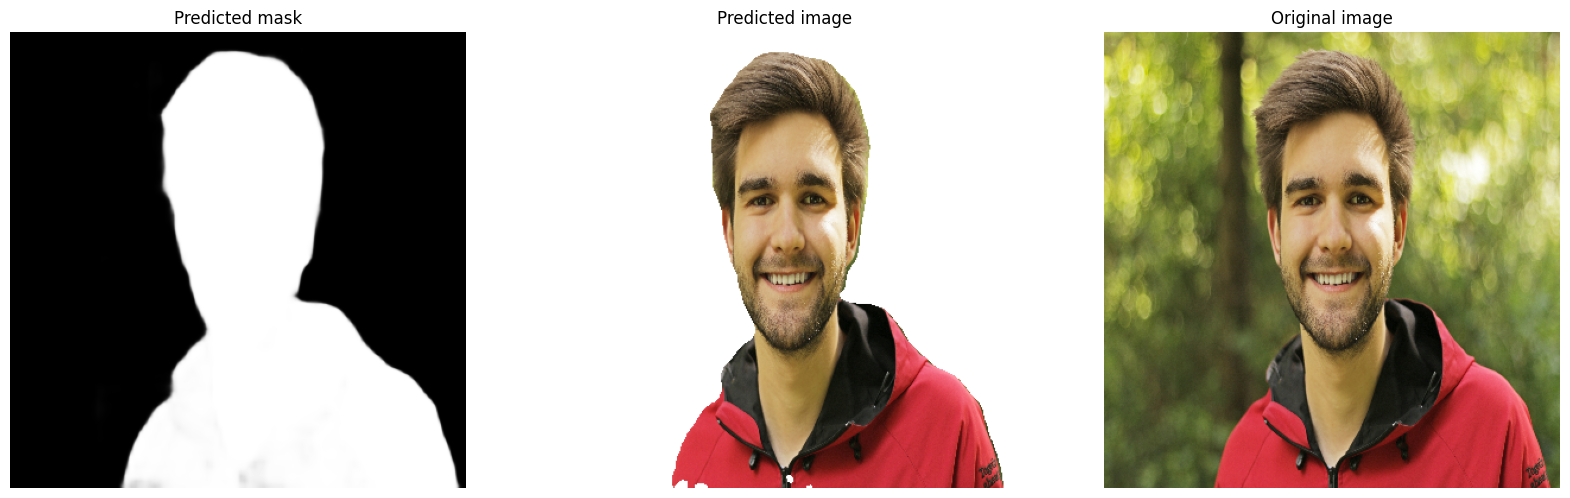



1/1 [==============================] - 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


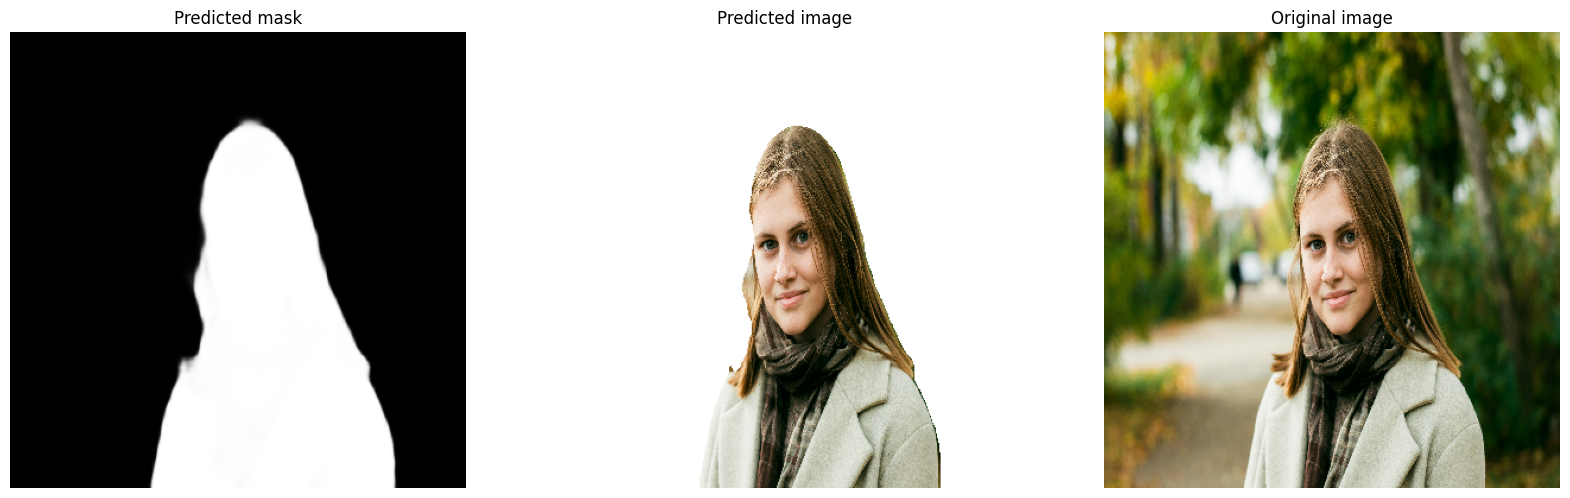



1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


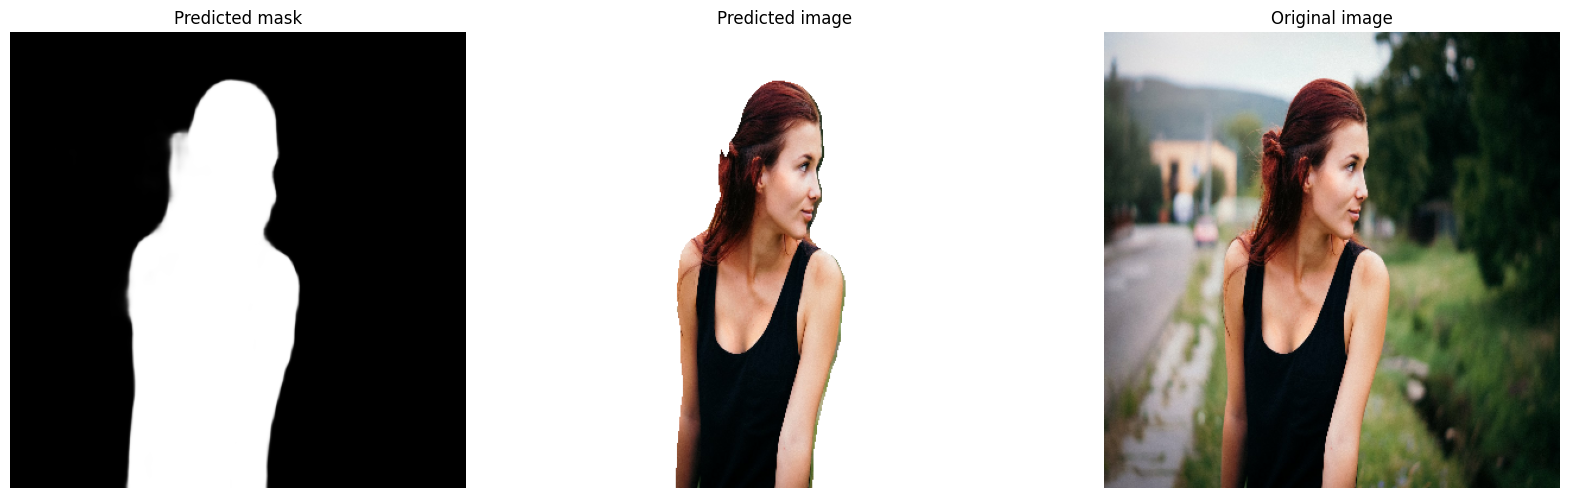

In [39]:
for img_path in examp_img:
    fig = plt.figure(figsize=(20,13))
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH), method="bicubic")
    image = tf.cast(image, dtype=tf.float32) / 255.
    pred = model.predict(tf.expand_dims(image, 0))[0]
    mask = (pred < 0.9)
    mask = tf.where(mask, tf.ones_like(image), image)
    mask = tf.image.resize(mask, size=(384, 384), method='bicubic')
    fig.add_subplot(1, 3, 1)
    plt.imshow(pred, cmap="gray")
    plt.title('Predicted mask')
    plt.axis('off')
    fig.add_subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.title('Predicted image')
    plt.axis('off')
    fig.add_subplot(1, 3, 3)
    plt.imshow(image, cmap="gray")
    plt.title('Original image')
    plt.axis('off')
    plt.show()
    print(end="\n\n")
    